<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/mod7_Linear_Regression_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 3.52
Mean Squared Error (MSE): 23.53
Root Mean Squared Error (RMSE): 4.85
R-squared (R2): 0.32
Intercept: -0.6846004264924659
Coefficient for 'PROT': 0.5883893977930335


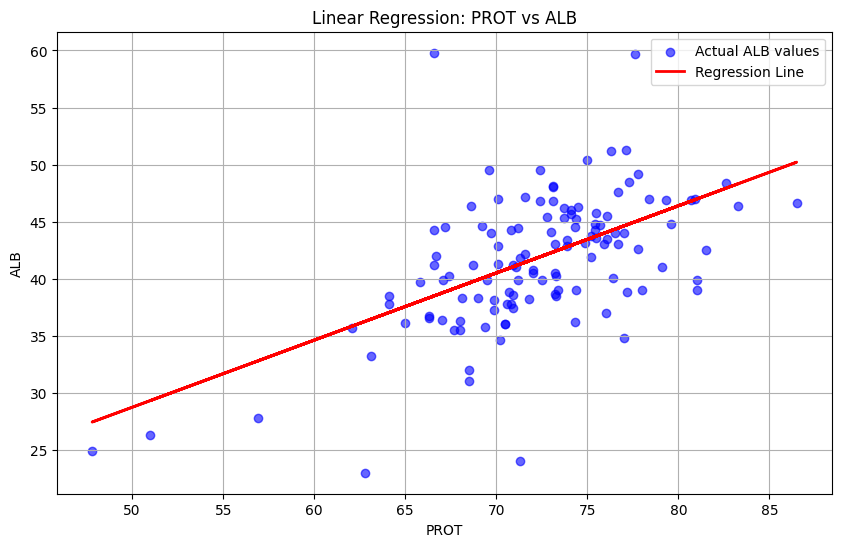

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("/content/HepatitisCdata.csv")
# Ensure "ALB" and "PROT" columns exist in the dataset
if 'ALB' in data.columns and 'PROT' in data.columns:
    # Drop rows with missing values in 'ALB' or 'PROT'
    data_filtered = data[['PROT', 'ALB']].dropna()

    # Define features (X) and target (y)
    X = data_filtered[['PROT']]
    y = data_filtered['ALB']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Linear Regression Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Coefficients
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient for 'PROT': {model.coef_[0]}")

    # Predictions
    y_pred = model.predict(X_test)

    # Visualization
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual values
    plt.scatter(X_test, y_test, color='blue', label='Actual ALB values', alpha=0.6)

    # Regression line
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

    plt.title("Linear Regression: PROT vs ALB")
    plt.xlabel("PROT")
    plt.ylabel("ALB")
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("The dataset does not have 'ALB' and 'PROT' columns.")

1. Mean Absolute Error (MAE): 3.52
The MAE represents the average absolute difference between the actual cholesterol (CHOL) values and the predicted values.
Interpretation: On average, the model's predictions differ from the actual CHOL values by 3.52 units. Lower MAE indicates better accuracy.
2. Mean Squared Error (MSE): 23.53
MSE measures the average squared difference between the actual and predicted values. It gives more weight to larger errors due to squaring.
Interpretation: The average squared error is 23.53 units², which indicates the model’s performance. While MSE penalizes larger errors heavily, its value depends on the scale of the target variable (CHOL).
3. Root Mean Squared Error (RMSE): 4.85
RMSE is the square root of MSE, providing a measure of error in the same units as the target variable.
Interpretation: The model’s predictions deviate from actual CHOL values by approximately 4.85 units on average. This metric is comparable to the standard deviation of CHOL, and lower values suggest better model performance.
4. R-squared (R²): 0.32
R² represents the proportion of variance in the target variable (CHOL) that is explained by the model.
Interpretation: The model explains 32% of the variation in CHOL values based on the Age feature. This indicates a modest fit—there is room for improvement, and other factors likely influence CHOL beyond Age.
5. Intercept: -0.685
The intercept represents the expected value of CHOL when Age is 0.
Interpretation: While the intercept may not have direct physical meaning in this context (as Age = 0 is unrealistic), it is part of the regression equation used to make predictions.
6. Coefficient for 'PROT' (Protein): 0.588
The coefficient indicates the expected change in CHOL for a one-unit increase in Age, holding all else constant.
Interpretation: For every additional year of Age, CHOL increases by 0.588 units on average. This positive coefficient indicates a positive relationship between Age and CHOL.